# Design Decisions

## Problem


Our project, Bird Sound Detector which aims to build a machine learning model to detect bird species by their song. 

Input: Mel spectrogram image dimensions 48 x 128

Output: True or False, described in dimensions 1 x 95 (total numbers of species)

Evaluation metric: We chose accuracy and F1 score since the project focus is the species detection so that it is not too critical problem to have FP or FN.



## Our Data
We use the dataset from [Kaggle](https://www.kaggle.com/competitions/birdclef-2021/data).  This dataset is a standardized version of some of the bird call audio data in [XenoCanto](https://xeno-canto.org/)



### train_short_audio
The bulk of the training data consists of short recordings of individual bird calls generously uploaded by users of [XenoCanto](https://xeno-canto.org/).org. These files have been downsampled to 32 kHz where applicable to match the test set audio and converted to the ogg format. The training data should have nearly all relevant files; we expect there is no benefit to looking for more on XenoCanto

### train_metadata.csv
A wide range of metadata for the training data. 

The most directly relevant fields are:

- `primary_label`: a code for the bird species. You can review detailed information about the bird codes by appending the code to https://ebird.org/species/, such as https://ebird.org/species/amecro for the American Crow.
- `author`: the user who provided the recording.
- `latitude & longitude`: coordinates for where the recording was taken. Some bird species may have local call ‘dialects,’ so you may want to seek geographic diversity in your training data.
- `date`: while some bird calls can be made year round, such as an alarm call, some are restricted to a specific season. You may want to seek temporal diversity in your training data.
- `filename`: the name of the associated audio file.
- `scientific_name & common_name`: Scientific terms and common terms of bird name
- `time `: Time in the day when the audio was recorded
- `url` : original recording data url specified in xeno-canto
- `rating` : the quality of the audio recording


### train_soundscape_labels.csv

- `row_id`: ID code for the row.

- `site` Site ID.

- `seconds`: the second ending the time window

- `audio_id`: ID code for the audio file.

- `birds`: space delimited list of any bird songs present in the 5 second window. The label nocall means that no call occurred.

### Data Exploration
We performed data exploration in the separated [Google Colab Notebook](https://colab.research.google.com/drive/1ghHy3EoUlnt3bnV-g4k_Yxw59wfiUCwt?usp=sharing). 

In the result of the exploration, we have discovered that there are a total 397 species with in the dataset. And the distribution is as follows; 28 species with less than 50 recordings, 300 species with between 50 and 200 recordings, and 20 species with over 500 recordings. 




In addition, the dataset ranging in size from 6kb to 32mb of recording time. 
More than 95% of files are smaller than 5000kb

These result illustrates that the dataset is not balanced so that the number of data needs to be standardized before moving on to the machine learning.

Therefore we decided to narrow them down to 95 species/11692 audio recordings based on species popularity and audio quality to proceed further processes.

## Our Options


### MLP (Multi-layer perceptron)
In the early work, applying NNs to animal sound used the basic MLP archetecture. It uses manually-designed summary features (such as syllable duration, peak frequency) as an input. However it is superseded and dramatically outperformed by CNN and (to a lesser extent) recurrent neural network (RNN) architectures. Because they can take advantage of the sequential/grid structure in raw or lightly-preprocessed data, so the input to CNN/RNN can be time series or time-frequency spectrogram data.
### CNN (Convolutional Neural Network)
In CNN, acoustic data is reduced to a small number of summary features in a manually-designed feature extraction process—keeps the input in a much higher dimensional format, allowing for much richer information to be presented. CNN having many fewer free parameters than the equivalent MLP, thus being easier to train.
### RNN (Recurrent Neural Network)
It is widely understood that sound scenes and vocalisations can be driven by dependencies over both short and very long timescales. This consideration about time series in general was the inspiration for the design of recurrent neural networks.It has the capacity to pass information forwards (and/or backwards) arbitrarily far in time while making inferences. Hence, RNNs have often been explored to process sound, including animal sound.
### CRNN
In around 2017 it was observed that adding an RNN layer after the convolutional layers of a CNN could give strong performance in multiple audio tasks, with an interpretation that the RNN layer(s) perform temporal integration of the information that has been preprocessed by the early layers. However, CRNNs can be more computationally intensive to train than CNNs, and the added benefit is not universally clear.



## Our Solution



We chose CNN for these reasons:
- Our input data is mel spectrogram of audio, and CNN is usually utilized for image recognition, pattern recognition and computer vision.
- CNN is considered as more powerful tool than RNN. RNN has less features and low capabilities compeared to CNN.
- CNNs are now dominant. There are a lot off-the-shelf CNN architectures can be used and evaluated.


### Hyperparameters
- `activation function`: ReLU
- `optimizer`: Adam
- `number of epochs`: 25
- `learning rate`: 0.001
- `dropout`: 0.5
- `batch size`: 32
- `number of layers and units` : 4 convolutional layers + 2 fully-connected layers. Each input data has a shape of (48,128), and is a 5 second mel-spectrogram.





## Evaluation



### Benchmarks
We evaluated the performance of our CNN model with 4 other benchmarks as following

- variant 2 : Changed activation function from relu to LeakyReLU 

- variant 3: changed kernel_size from (3,3) to (3,5)

- variant 4: Changed activation function from relu to tanh

- Random: Guess species by random guess

### Evaluation metrics

We decided to focus accuracy and F1 score. Because in the typical sound classification project, precision and recall are equally important.

- accuracy: measures the number of predictions that are correct as a percentage of the total number of predictions that are made. 
- F1 score: the harmonic mean of precision and recall. F1 score has been designed to work well on imbalanced data.

### Result

We investigated all the variants above (n=3, max epochs=25) and the result of evaluation metrics are as follows.

Based on the mean value, v2 showed the best results in both accuracy and F1 score.
v1, 3, and 4 were nearly the same in terms of accuracy. In terms of F1 score, however, v3 came in second with 0.055, followed by v1 with 0.038, and v4 recorded only 0.01.

Random guess always scored nearly 0.01 as it should behave

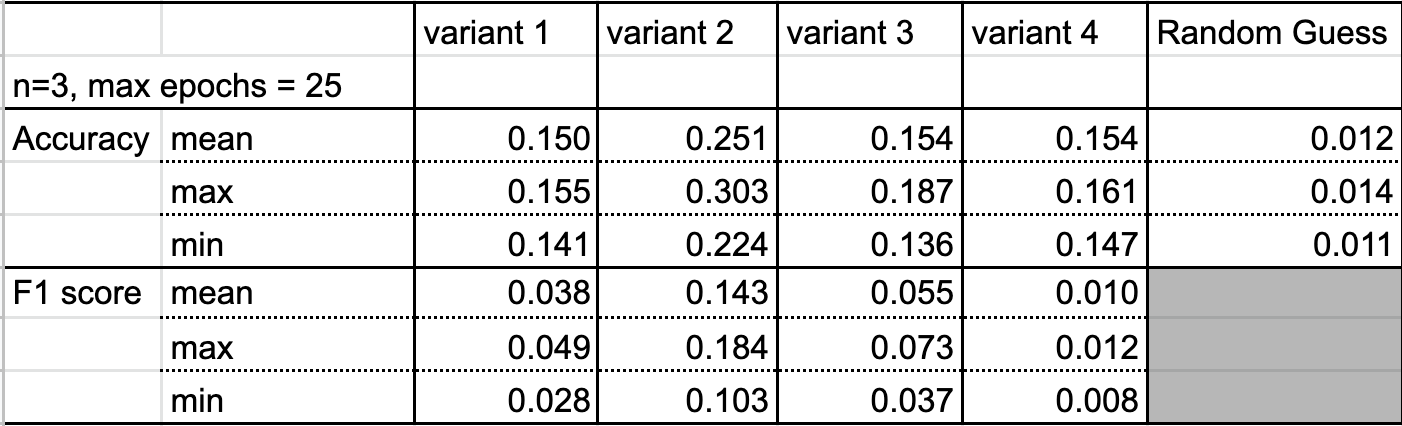

We also increased the maximum number of epochs from 25 to 50 and tried all variations. This was because we expected especially v3 to require more training time, since we changed the karnel size from (3,3) to (3,5).

In this condition, v2 still scored the best in both accuracy and f1 score. 
In terms of accuracy, v3 has improved by almost 50% compared to the previous condition, while v1 and v4 have only improved by 25%.
About the F1 score, v3 recoded 0.13, followed by v1 with 0.080, and v4 resulted 0.031.

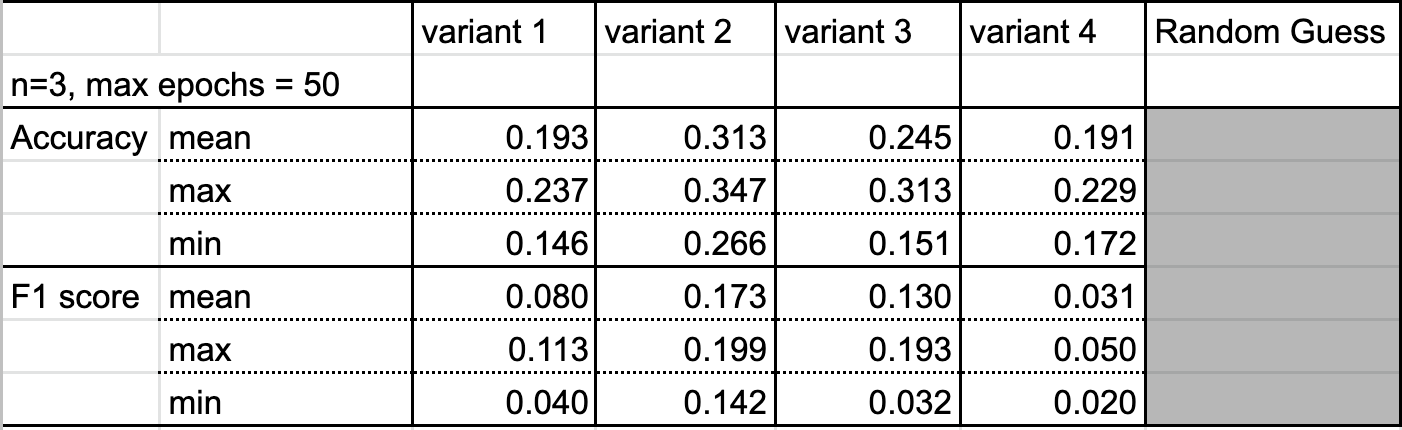

Overall, while v3 showed a significant performance improvement with the increase in epochs, v2 exceeded it and always performed the best. 

### Possible solution for overfitting
- Use data augmentation
- Add regularization
- Reduce architectur complexity


# Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import os
import librosa
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile as wav
import math, random
from tqdm import tqdm
import csv

from PIL import Image

from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import torch
import torchaudio
from torchaudio import transforms
from torch.utils.data import DataLoader, Dataset, random_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/Shareddrives/Detecting bird sounds/birdclef-2021/'
AUDIO_PATH = '/content/drive/Shareddrives/Detecting bird sounds/birdclef-2021/train_short_audio/'
OUTPUT_DIR = '/content/drive/Shareddrives/Detecting bird sounds/_images/'

In [ ]:
# Global Variables
RANDOM_SEED = 1337
SAMPLE_RATE = 32000
SIGNAL_LENGTH = 5 # seconds
SPEC_SHAPE = (48, 128) # height x width of mel-spectrogram 
FMIN = 500
FMAX = 12500
MAX_AUDIO_FILES = 1500

# Metadata Analysis

### Import CSV

In [ ]:
df = pd.read_csv(os.path.join(BASE_PATH,'train_metadata.csv'))
df.drop(columns=['scientific_name', 'author', 'url', 'license'], inplace=True)
df['rel_path'] = '/' + df['primary_label'].astype(str) + '/' + df['filename'].astype(str)
df.head()

,primary_label,secondary_labels,type,latitude,longitude,common_name,date,filename,rating,time,rel_path
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Acadian Flycatcher,2012-08-12,XC109605.ogg,2.5,09:30,/acafly/XC109605.ogg
1,acafly,[],['call'],9.1334,-79.6501,Acadian Flycatcher,2000-12-26,XC11209.ogg,3.0,?,/acafly/XC11209.ogg
2,acafly,[],['call'],5.7813,-75.7452,Acadian Flycatcher,2012-01-10,XC127032.ogg,3.0,15:20,/acafly/XC127032.ogg
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Acadian Flycatcher,2009-06-19,XC129974.ogg,3.5,07:50,/acafly/XC129974.ogg
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Acadian Flycatcher,2009-06-19,XC129981.ogg,3.5,07:50,/acafly/XC129981.ogg


### Select Bird Speicies by the number of recordings

In [ ]:
# Select speices that have more than 200 recordings
df = df[df['common_name'].map(df['common_name'].value_counts()) > 200] 
# Select audio recordings with good quality
df = df[df['rating']>4.0] 
df

,primary_label,secondary_labels,type,latitude,longitude,common_name,date,filename,rating,time,rel_path
335,aldfly,"['comyel', 'amecro', 'sonspa', 'comloo']",['song'],46.8107,-90.6776,Alder Flycatcher,2013-06-23,XC139577.ogg,4.5,06:57,/aldfly/XC139577.ogg
337,aldfly,[],['call'],44.4584,-68.9242,Alder Flycatcher,2008-07-02,XC142065.ogg,5.0,06:00,/aldfly/XC142065.ogg
343,aldfly,['tenwar'],['call'],44.2570,-68.3890,Alder Flycatcher,2013-07-18,XC144672.ogg,4.5,06:50,/aldfly/XC144672.ogg
345,aldfly,[],"['""zweeoo"" call']",44.2280,-68.3120,Alder Flycatcher,2013-07-18,XC144675.ogg,5.0,06:20,/aldfly/XC144675.ogg
363,aldfly,"['amegfi', 'comyel', 'fiespa', 'amecro']",['song'],44.7070,-93.3290,Alder Flycatcher,2014-05-25,XC179600.ogg,4.5,06:00,/aldfly/XC179600.ogg
...,...,...,...,...,...,...,...,...,...,...,...
62521,yeofly1,[],['song'],-23.4693,-45.1695,Yellow-olive Flycatcher,1999-10-24,XC81739.ogg,4.5,07:51,/yeofly1/XC81739.ogg
62522,yeofly1,[],['song'],-19.0100,-57.6528,Yellow-olive Flycatcher,2000-01-16,XC81740.ogg,4.5,06:47,/yeofly1/XC81740.ogg
62523,yeofly1,[],['song'],-22.4167,-42.9834,Yellow-olive Flycatcher,2001-03-13,XC81741.ogg,4.5,09:54,/yeofly1/XC81741.ogg
62524,yeofly1,['rubpep1'],"['', 'song']",-29.4501,-50.5667,Yellow-olive Flycatcher,2002-11-27,XC81742.ogg,4.5,06:44,/yeofly1/XC81742.ogg


In [ ]:
# Select the column for the training
train = df[['primary_label', 'rel_path']]
train

,primary_label,rel_path
335,aldfly,/aldfly/XC139577.ogg
337,aldfly,/aldfly/XC142065.ogg
343,aldfly,/aldfly/XC144672.ogg
345,aldfly,/aldfly/XC144675.ogg
363,aldfly,/aldfly/XC179600.ogg
...,...,...
62521,yeofly1,/yeofly1/XC81739.ogg
62522,yeofly1,/yeofly1/XC81740.ogg
62523,yeofly1,/yeofly1/XC81741.ogg
62524,yeofly1,/yeofly1/XC81742.ogg


In [ ]:
# Shuffle the training data and limit the number of audio files to MAX_AUDIO_FILES
TRAIN = shuffle(train, random_state=RANDOM_SEED)[:MAX_AUDIO_FILES]
TRAIN

,primary_label,rel_path
54049,trokin,/trokin/XC124262.ogg
29707,houwre,/houwre/XC342077.ogg
40387,pirfly1,/pirfly1/XC589901.ogg
27186,grtgra,/grtgra/XC398611.ogg
28950,houspa,/houspa/XC124181.ogg
...,...,...
43557,rewbla,/rewbla/XC595331.ogg
20587,easmea,/easmea/XC360825.ogg
29918,houwre,/houwre/XC603268.ogg
37163,norwat,/norwat/XC178131.ogg


In [ ]:
# Count the number of species
species = TRAIN.groupby('primary_label').count().sort_values(by='rel_path', ascending=False)
species

,rel_path
primary_label,
houwre,68
redcro,53
houspa,50
gbwwre1,44
bncfly,36
...,...
sumtan,6
whtspa,5
norfli,5


In [ ]:
# Make a label for the training
LABELS = sorted(TRAIN.primary_label.unique())

### Load audiofiles 

In [ ]:
sample = os.path.join(AUDIO_PATH, 'aldfly/XC133197.ogg')

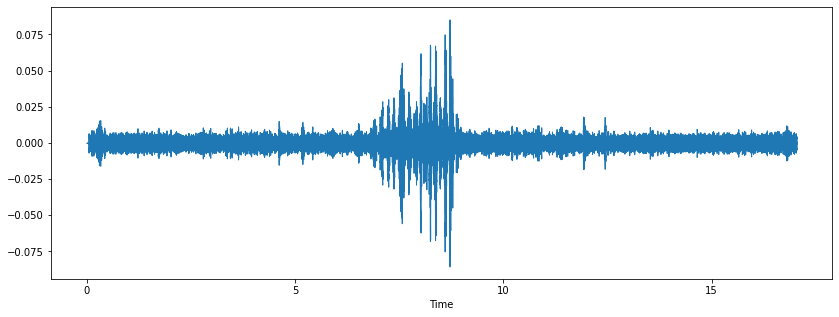

In [ ]:
plt.figure(figsize=(14,5))
acafly, sample_rate=librosa.load(sample)
librosa.display.waveshow(acafly)
ipd.Audio(sample)

In [ ]:
audio, sample_rate =librosa.load(sample, res_type='kaiser_fast')
sample_rate

22050

# Audio Preprocessing

### Feature Extraction


#### Splitting audio files

In [ ]:
# Funciton to split the first 15 secs of audio into 3*5 sec chunks
def split_audio(audio):
  # Load the file with librosa and limit them to the first 15 seconds
  sig, rate = librosa.load(audio, sr=SAMPLE_RATE, offset=None, duration=15)

  # Split signals into 5 seconds of chunks
  sig_splits = []
  for i in range(0, len(sig), int(SIGNAL_LENGTH * SAMPLE_RATE)):
    split = sig[i:i + int(SIGNAL_LENGTH * SAMPLE_RATE)]

    if len(split) < int(SIGNAL_LENGTH * SAMPLE_RATE):
            break
        
    sig_splits.append(split)

  return sig_splits

#### Mel Spectrogram

In [ ]:
# Function to extract mel spectrograms
def audio_to_mel(spec):
  hop_length = int(SIGNAL_LENGTH * SAMPLE_RATE / (SPEC_SHAPE[1] - 1))
  mel_spec = librosa.feature.melspectrogram(y=spec, 
                                            sr=SAMPLE_RATE, 
                                            n_fft=1024, 
                                            hop_length=hop_length, 
                                            n_mels=SPEC_SHAPE[0], 
                                            fmin=FMIN, 
                                            fmax=FMAX)
  mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

  # Normalize between 0.0 and 1.0
  mel_spec -= mel_spec.min()
  mel_spec /= mel_spec.max()

  return mel_spec

In [ ]:
sig = split_audio(sample)
sample_mel = audio_to_mel(sig[0])
sample_mel.shape

(48, 128)

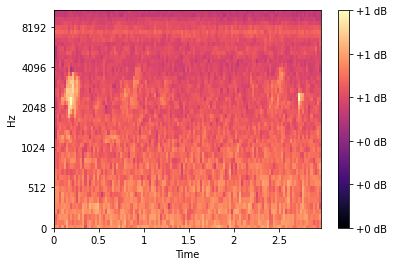

In [ ]:
librosa.display.specshow(sample_mel, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

#### Save Mel Spec as Image

In [ ]:
# A function to save mel spectrogram as png image file
def save_img(mel_spec, path, label, idx, dir):
  save_dir = os.path.join(dir, label)
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)
  save_path = os.path.join(save_dir, path.rsplit(os.sep, 1)[-1].rsplit('.', 1)[0] + '_' + str(idx) + '.png')
  img = Image.fromarray(mel_spec * 255.0).convert("L")
  img.save(save_path)
  return save_path

### Define sound dataset

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# Sound Dataset
class SoundDS(Dataset):
  def __init__(self, df, data_path, output_dir):
    self.df = df
    df.reset_index(drop=True, inplace=True)
    self.data_path = str(data_path)
    self.output_dir = str(output_dir)

  def __len__(self):
    return ds.df.shape[0]

  def getImage(self, idx):
    audio = self.data_path + self.df.loc[idx, 'rel_path']
    label = self.df.loc[idx, 'primary_label']

    sig_splits = split_audio(audio)
    saved_samples = []
    for i in range(len(sig_splits)):
      mel_spec = audio_to_mel(sig_splits[i]) 
      save_path = save_img(mel_spec, audio, label, i, self.output_dir)
      saved_samples.append(save_path)
    
    return save_path

In [ ]:
# Configure Sound dataset with TRAIN dataframe
ds = SoundDS(TRAIN, AUDIO_PATH, OUTPUT_DIR)

In [ ]:
# Shuffle the images of spectrogram and save them into TRAIN_SPECS
# samples  = []
# for i in tqdm(range(ds.__len__())):
#   samples.append(ds.getImage(i))
# TRAIN_SPECS = shuffle(samples, random_state=RANDOM_SEED)

In [ ]:
# Save TRAIN_SPECS as a csv file
# import csv
# path = os.path.join(BASE_PATH, 'download/_train_specs.csv')

# with open(path,'w') as f:
#     wr = csv.writer(f, dialect='excel')
#     wr.writerow(TRAIN_SPECS)

In [ ]:
# Load TRAIN_SPECS csv file
TRAIN_SPECS_CSV = np.loadtxt(os.path.join(BASE_PATH, 'download/train_specs.csv'), delimiter=',', dtype='str')
TRAIN_SPECS_CSV

array(['/content/drive/Shareddrives/Detecting bird sounds/images/houspa/XC532236_2.png',
       '/content/drive/Shareddrives/Detecting bird sounds/images/bulori/XC261335_2.png',
       '/content/drive/Shareddrives/Detecting bird sounds/images/bewwre/XC490934_2.png',
       ...,
       '/content/drive/Shareddrives/Detecting bird sounds/images/houwre/XC451426_2.png',
       '/content/drive/Shareddrives/Detecting bird sounds/images/ruckin/XC607320_2.png',
       '/content/drive/Shareddrives/Detecting bird sounds/images/whcspa/XC206154_2.png'],
      dtype='<U79')

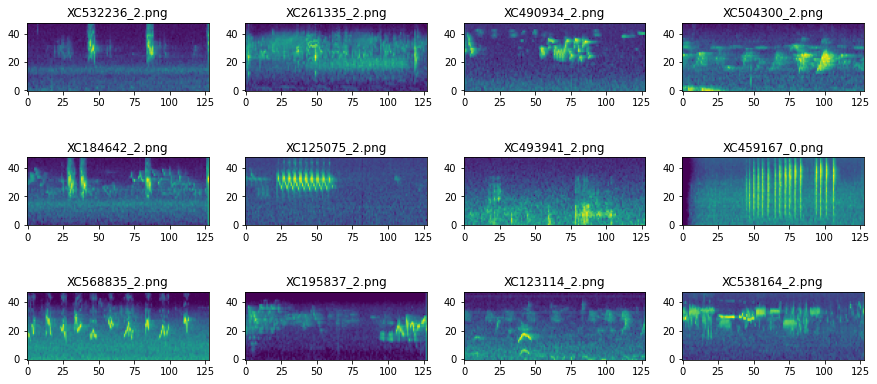

In [ ]:
# Plot the first 12 spectrograms of TRAIN_SPECS
plt.figure(figsize=(15, 7))
for i in range(12):
    spec = Image.open(TRAIN_SPECS_CSV[i])
    plt.subplot(3, 4, i + 1)
    plt.title(TRAIN_SPECS_CSV[i].split(os.sep)[-1])
    plt.imshow(spec, origin='lower')

### Data Labeling

In [ ]:
def labeling(dataset, labels):
# Parse all samples and add spectrograms into train data, primary_labels into label data
      train_specs, train_labels = [], []
      with tqdm(total=len(dataset)) as pbar:
        for path in dataset:
            pbar.update(1)

            # Open image
            spec = Image.open(path)

            # Convert to numpy array
            spec = np.array(spec, dtype='float32')
            
            # Normalize between 0.0 and 1.0  
            spec -= spec.min()
            spec /= spec.max()
            if not spec.max() == 1.0 or not spec.min() == 0.0:  #Exclude samples with nan 
                continue

            # Add channel axis to 2D array
            spec = np.expand_dims(spec, -1)

            # Add new dimension for batch size
            spec = np.expand_dims(spec, 0)

            # Add to train data
            if len(train_specs) == 0:
                train_specs = spec
            else:
                train_specs = np.vstack((train_specs, spec))

            # Add to label data
            target = np.zeros((len(labels)), dtype='float32')
            bird = path.split(os.sep)[-2]
            target[labels.index(bird)] = 1.0
            if len(train_labels) == 0:
                train_labels = target
            else:
                train_labels = np.vstack((train_labels, target))

        return train_specs, train_labels

In [ ]:
train_specs, train_labels = labeling(TRAIN_SPECS_CSV, LABELS)

100%|██████████| 1500/1500 [12:37<00:00,  1.98it/s]


# Training

### Model Creation

In [ ]:
# tf.random.set_seed(RANDOM_SEED)

# A simple model with a sequence of convolutional blocks.
# Each block has the sequence conv --> relu --> batch normalization --> maxpool.
# Finally, perform global average pooling and add 2 dense layers.
# The last layer is our classification layer and is softmax activated.
model = tf.keras.Sequential([
    
    # First conv block
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second conv block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Third conv block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Fourth conv block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Global pooling instead of flatten()
    tf.keras.layers.GlobalAveragePooling2D(), 
    
    # Dense block
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dropout(0.5),
    
    # Classification layer
    tf.keras.layers.Dense(len(LABELS), activation='softmax')
])
print('MODEL HAS {} PARAMETERS.'.format(model.count_params()))

# Compile the model and specify optimizer, loss and metric
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
              metrics=['accuracy', 'Precision', 'Recall'])
print('MODEL HAS COMPILED')

# Add callbacks to reduce the learning rate if needed, early stopping, and checkpoint saving
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=25),
             tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(BASE_PATH, 'model/best_model.h5'), 
                                                monitor='val_loss', verbose=0, save_best_only=True)]

# Train the model for a few epochs
model.fit(train_specs, train_labels, batch_size=32, validation_split=0.2, callbacks=callbacks, epochs=50)



MODEL HAS 221343 PARAMETERS.
MODEL HAS COMPILED
Epoch 1/50
38/38 [==============================] - 14s 337ms/step - loss: 4.7317 - accuracy: 0.0242 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5261 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - 17s 450ms/step - loss: 4.4362 - accuracy: 0.0425 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5349 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 4.3088 - accuracy: 0.0667 - precision: 0.3333 - recall: 8.3333e-04
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 [==============================] - 12s 324ms/step - loss: 4.3088 - accuracy: 0.0667 - precision: 0.3333 - recall: 8.3333e-04 - val_loss: 4.6125 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0

# Evaluation

## Benchmarks

### Variant 2

In this variant, we tried LeakyReLU activation function

In [ ]:
model2 = tf.keras.Sequential([
    
    # First conv block
    # Use LeakyReLU activation function 
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(), 
                           input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second conv block
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Third conv block
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Fourth conv block
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Global pooling instead of flatten()
    tf.keras.layers.GlobalAveragePooling2D(), 
    
    # Dense block
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU()),   
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU()),   
    tf.keras.layers.Dropout(0.5), 
    
    # Classification layer
    tf.keras.layers.Dense(len(LABELS), activation='softmax')
])
print('MODEL HAS {} PARAMETERS.'.format(model.count_params()))

# Compile the model and specify optimizer, loss and metric
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
              metrics=['accuracy', 'Precision', 'Recall'])
print('MODEL HAS COMPILED')

# Add callbacks to reduce the learning rate if needed, early stopping, and checkpoint saving
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=25),
             tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(BASE_PATH, 'model/best_model.h5'), 
                                                monitor='val_loss', verbose=0, save_best_only=True)]

# Train the model for a few epochs
model2.fit(train_specs, train_labels, batch_size=32, validation_split=0.2, callbacks=callbacks, epochs=50)

MODEL HAS 221343 PARAMETERS.
MODEL HAS COMPILED
Epoch 1/50
38/38 [==============================] - 13s 315ms/step - loss: 4.7776 - accuracy: 0.0275 - precision: 1.0000 - recall: 8.3333e-04 - val_loss: 4.5402 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - 9s 230ms/step - loss: 4.3199 - accuracy: 0.0717 - precision: 0.3333 - recall: 0.0025 - val_loss: 4.5688 - val_accuracy: 0.0567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 4.1420 - accuracy: 0.0925 - precision: 0.5000 - recall: 0.0042
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 [==============================] - 9s 229ms/step - loss: 4.1420 - accuracy: 0.0925 - precision: 0.5000 - recall: 0.0042 - val_loss: 4.6777 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/50
38/38

### Variant 3

In this variant we changed karnel_size from (3,3) to (3,5)

In [ ]:
model3 = tf.keras.Sequential([
    
    # First conv block
    # Changed karnel size to (3,5)
    tf.keras.layers.Conv2D(16, (3, 5), activation='relu', 
                           input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second conv block
    tf.keras.layers.Conv2D(32, (3, 5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Third conv block
    tf.keras.layers.Conv2D(64, (3, 5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Fourth conv block
    tf.keras.layers.Conv2D(128, (3, 5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Global pooling instead of flatten()
    tf.keras.layers.GlobalAveragePooling2D(), 
    
    # Dense block
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dropout(0.5), 
    
    # Classification layer
    tf.keras.layers.Dense(len(LABELS), activation='softmax')
])
print('MODEL HAS {} PARAMETERS.'.format(model.count_params()))

# Compile the model and specify optimizer, loss and metric
model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
              metrics=['accuracy', 'Precision', 'Recall'])
print('MODEL HAS COMPILED')

# Add callbacks to reduce the learning rate if needed, early stopping, and checkpoint saving
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=25),
             tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(BASE_PATH, 'model/best_model.h5'), 
                                                monitor='val_loss', verbose=0, save_best_only=True)]

# Train the model for a few epochs
model3.fit(train_specs, train_labels, batch_size=32, validation_split=0.2, callbacks=callbacks, epochs=50)

MODEL HAS 221343 PARAMETERS.
MODEL HAS COMPILED
Epoch 1/50
38/38 [==============================] - 13s 298ms/step - loss: 4.7370 - accuracy: 0.0225 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5274 - val_accuracy: 0.0400 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - 13s 336ms/step - loss: 4.4126 - accuracy: 0.0467 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5066 - val_accuracy: 0.0367 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - 10s 264ms/step - loss: 4.3119 - accuracy: 0.0658 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5104 - val_accuracy: 0.0133 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 4.2241 - accuracy: 0.0567 - precision: 0.1250 - recall: 8.3333e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.

## Variant 4
In this variant, we tried tanh activation function

In [ ]:
model4 = tf.keras.Sequential([
    
    # First conv block
    # Use LeakyReLU activation function 
    tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', 
                           input_shape=(SPEC_SHAPE[0], SPEC_SHAPE[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second conv block
    tf.keras.layers.Conv2D(32, (3, 3), activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Third conv block
    tf.keras.layers.Conv2D(64, (3, 3), activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    
    # Fourth conv block
    tf.keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Global pooling instead of flatten()
    tf.keras.layers.GlobalAveragePooling2D(), 
    
    # Dense block
    tf.keras.layers.Dense(256, activation='tanh'),   
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation='tanh'),   
    tf.keras.layers.Dropout(0.5), 
    
    # Classification layer
    tf.keras.layers.Dense(len(LABELS), activation='softmax')
])
print('MODEL HAS {} PARAMETERS.'.format(model.count_params()))

# Compile the model and specify optimizer, loss and metric
model4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.01),
              metrics=['accuracy', 'Precision', 'Recall'])
print('MODEL HAS COMPILED')

# Add callbacks to reduce the learning rate if needed, early stopping, and checkpoint saving
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=25),
             tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(BASE_PATH, 'model/best_model.h5'), 
                                                monitor='val_loss', verbose=0, save_best_only=True)]

# Train the model for a few epochs
model4.fit(train_specs, train_labels, batch_size=32, validation_split=0.2, callbacks=callbacks, epochs=50)

MODEL HAS 221343 PARAMETERS.
MODEL HAS COMPILED
Epoch 1/50
38/38 [==============================] - 13s 307ms/step - loss: 4.8258 - accuracy: 0.0292 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.4904 - val_accuracy: 0.0500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - 8s 219ms/step - loss: 4.5895 - accuracy: 0.0392 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.6552 - val_accuracy: 0.0167 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 4.4784 - accuracy: 0.0492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 [==============================] - 8s 218ms/step - loss: 4.4784 - accuracy: 0.0492 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.8108 - val_accuracy: 0.0067 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 -

### Random Guess

In [ ]:
# Random guess function 
def random_guess(train, labels):
  total = len(train)
  correct = 0

  for i in range(len(train)):
    # Guess random species from labels
    rand_idx = random.randrange(len(labels))
    if labels[rand_idx] == TRAIN['primary_label'].values[i]:
      correct += 1

  accuracy = correct/total
  return '{0:.3g}'.format(accuracy)

random_guess(TRAIN, LABELS)

'0.00733'